In [2]:
import torch
import tal
import cv2
import numpy as np

from model.nerf import NLOSNeRF
from model.scene import Scene
from matplotlib import pyplot as plt

In [ ]:
import sys
path_mitsuba = "../"

In [18]:
sensor_x = 64
sensor_y = 64
scale = 1
t_max = 256
arg_start = 0
arg_end = torch.pi
delta_m_meters = 0.05
n_spherical_coarse_bins = 9
scene = Scene(sensor_x=sensor_x, sensor_y=sensor_y)
model = NLOSNeRF()

In [2]:
r_max = delta_m_meters * t_max / 2
rw = scene.relay_wall()
    
x_min, x_max = torch.min(rw[..., 0]) - r_max, torch.max(rw[..., 0]) + r_max
y_min, y_max = torch.min(rw[..., 1]) - r_max, torch.max(rw[..., 1]) + r_max
z_min, z_max = 0, r_max

NameError: name 'delta_m_meters' is not defined

In [37]:
center = np.array([0, 0, 0.5])
sensor_res_x = 128
sensor_res_y = 128
device_uri_gpu = "cuda:0"
model = NLOSNeRF().to(device=device_uri_gpu)
dict_ = torch.load("./data/models/T-scene-single-oneshot-64-b8.pth")
model.load_state_dict(dict_["model_state_dict"])
dx = 1 
dy = 1
dz = 1 / np.sqrt(2)
xv = torch.linspace(start=center[0]+(dx/2), end=center[0]-(dx/2), steps=sensor_res_x)
yv = torch.linspace(start=center[1]+(dy/2), end=center[1]-(dy/2), steps=sensor_res_y)
zv = torch.linspace(start=center[2]-(dz/2), end=center[2]+(dy/2), steps=sensor_res_x)
X, Y, Z = torch.meshgrid(xv, yv, zv, indexing="ij")
stack_pts = torch.stack((-Y, -X, Z), axis=-1)
stack_dirs = (torch.pi / 2) * torch.ones((sensor_res_x, sensor_res_y, sensor_res_x, 2))
stack_input = torch.cat((stack_pts, stack_dirs), dim=-1)
with torch.no_grad():
    result = model(model.fourier_encoding(stack_input, x_min=x_min, x_max=x_max, y_min=y_min, y_max=y_max, z_min=z_min, z_max=z_max).to(device=device_uri_gpu))
    result = torch.prod(result, dim=-1).detach().cpu().numpy()

In [25]:
result.shape

(64, 64, 64)

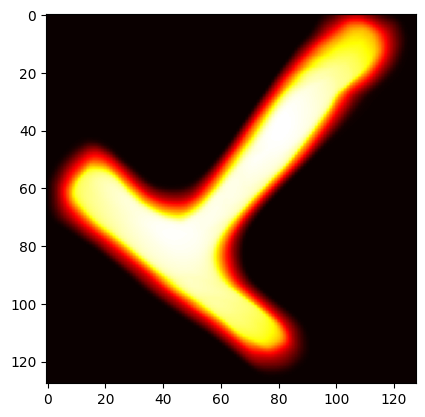

In [38]:
fig, ax = plt.subplots()
rec = np.max(result, axis=-1)
ax.imshow(rec, cmap="hot")

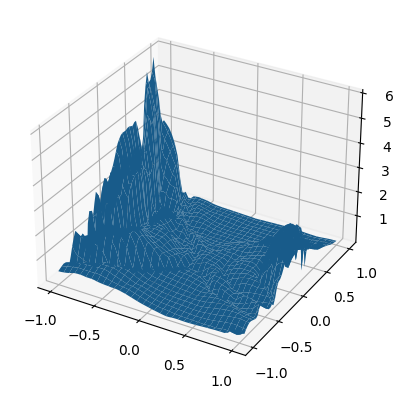

In [41]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = np.linspace(start=-1, stop=1, num=sensor_res_x)
ys = np.linspace(start=-1, stop=1, num=sensor_res_y)
X, Y = np.meshgrid(xs, ys)

ax.plot_surface(X, Y, result[..., -1])

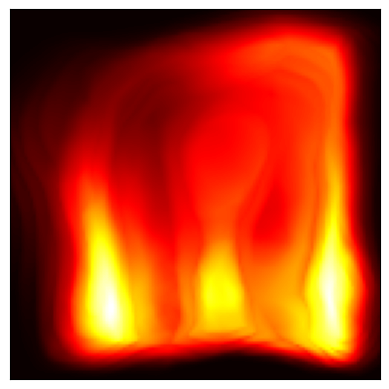

In [23]:
fig, ax = plt.subplots()
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(rec, cmap="hot")

In [3]:
path = "./data/nlos-letters/nlos-letters.hdf5"
gt_data = tal.io.read_capture(path)
tal.reconstruct.compensate_laser_cos_dsqr(gt_data)
gt_H = torch.from_numpy(gt_data.H)
center = np.array([0, 0, 0.5])

In [7]:
sensor_x = 64
sensor_y = 64
scale = 1
t_max = 1024
arg_start = 0
arg_end = torch.pi
delta_m_meters = 0.01
n_spherical_coarse_bins = 9
scene = Scene(sensor_x=sensor_x, sensor_y=sensor_y)

In [10]:
rw = scene.relay_wall()
offset = 1 / np.sqrt(2)
torch.where(rw > offset)

(tensor([ 0,  0,  0,  ..., 63, 63, 63]),
 tensor([55, 56, 57,  ..., 62, 63, 63]),
 tensor([1, 1, 1,  ..., 1, 0, 1]))

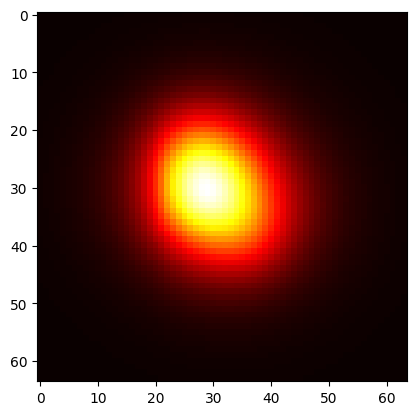

In [3]:
projected_lc_np = torch.sum(gt_H, dim=0).detach().cpu().numpy()
plt.imshow(projected_lc_np, cmap="hot")

In [105]:
import cv2 
projected_lc = torch.sum(gt_H, dim=0).detach().cpu().numpy()
#Segmentation by chromatic values according to "Intrinsic images clustering"  Garces et al
max_iter = 1000
K = 2
eps = 1e-5
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, max_iter, eps)
ret, label, center = cv2.kmeans(projected_lc, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [109]:
projected_lc[label.flatten() == 1].shape

(42, 64)

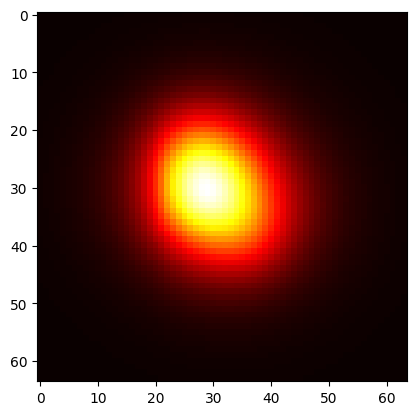

In [38]:
plt.imshow(projected_lc, cmap="hot")

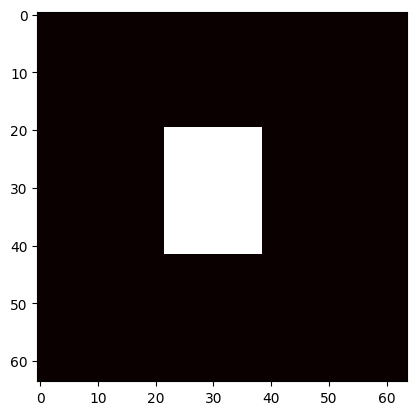

In [111]:
plt.imshow(res, cmap="hot")

In [116]:
np.where(res == 1)

(array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
        21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
        22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
        23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
        24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
        26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
        27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
        28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
        29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
        32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
        33, 

In [3]:
def get_volume(nx, ny, center):
    """_summary_

    Args:
        nx (_type_): _description_
        ny (_type_): _description_
    """
    dx = 1 / np.sqrt(2)
    dy = 1 / np.sqrt(2)
    dz = 1 / np.sqrt(2)
    xv = np.linspace(start=center[0]-dx/2, stop=center[0]+dx/2, num=nx)
    yv = np.linspace(start=center[1]-dy/2, stop=center[1]+dy/2, num=ny)
    zv = np.linspace(start=center[2]-dz/2, stop=center[2]+dz/2, num=nx)
    X, Y, Z = np.meshgrid(xv, yv, zv)
    return np.stack((X, -Y, Z), axis=-1)

volume_xyz = get_volume(64, 64, center=center)

In [4]:
with tal.resources(8):
    rec = tal.reconstruct.fbp.solve(
        data=gt_data,  volume_xyz=volume_xyz, wl_mean=0.2, wl_sigma=0.2
    )

tal.reconstruct.filter_H: Using wavelengths from 0.1325m to 0.4081m
tal.resources: Using 8 CPU processes and downscale 8.


tal.resources progress: 100%|██████████| 8/8 [00:00<00:00, 154.33it/s]           

tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3


tal.resources: Using 8 CPU processes and downscale 8.


tal.resources progress: 100%|██████████| 8/8 [01:13<00:00,  9.19s/it]


## Depth estimation as framework to evaluate results

In [4]:
torch.where(gt_H > 0)

(tensor([ 100,  100,  100,  ..., 1023, 1023, 1023]),
 tensor([13, 13, 13,  ..., 62, 63, 63]),
 tensor([ 7,  8,  9,  ..., 55,  7, 39]))

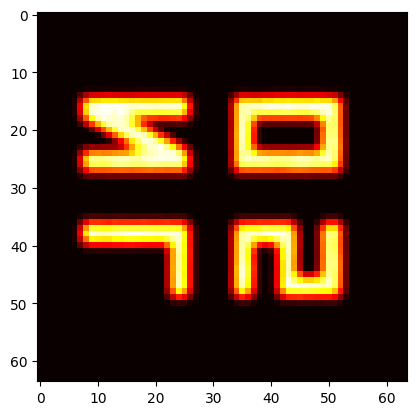

In [5]:
plt.imshow(gt_H[100, :, :], cmap="hot")

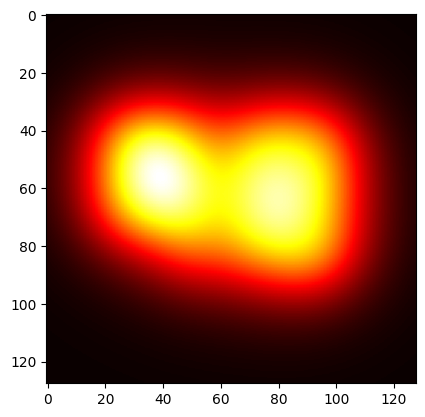

In [15]:
plt.imshow(torch.sum(gt_H, dim=0), cmap="hot")